<h1>Real-Time Stock Analysis and News Scraper</h1>

<b>Created By </b>: Mosammat Muna

<b>Script Description</b>:This script analyzes and visualizes stock data and fetches related news articles for given stock symbols. It installs the yfinance library, prompts the user for stock symbols and periods, then plots historical stock prices, moving averages, and trading volumes. It also computes key performance metrics and displays interactive stock charts. Finally, it scrapes Yahoo News for recent articles related to the stocks, prints the 4 articles headlines, sources, and URLs, and saves all news article information into a CSV file.

In [35]:
# Cell 1: Importing necessary libraries and installing dependencies

# Install the yfinance package to fetch stock data
%pip install -U yfinance

# Import all libraries for this script
import yfinance as yahoofin  # For fetching stock data
import matplotlib.pyplot as plt  # For creating static plots
import pandas as pd  # For data manipulation and analysis
import plotly.graph_objs as go  # For creating interactive plots
from plotly.subplots import make_subplots  # For creating subplots in Plotly
import re  # For regular expression operations
import csv  # For handling CSV file operations
from time import sleep  # For introducing delays in loops (used for web scraping)
from bs4 import BeautifulSoup  # For parsing HTML and XML documents
import requests  # For sending HTTP requests

In [28]:
# Cell 2: Get user input
# Ask the user to input the stock company names and the periods
user_symbols = input("Enter the stock symbols separated by commas (e.g., AAPL, GOOGL, MSFT): ").upper().split(',')
periods = input("Enter the periods separated by commas (e.g., '1y, 6mo, 3mo'): ").split(',')

Enter the stock symbols separated by commas (e.g., AAPL, GOOGL, MSFT): AAPL,GOOGL
Enter the periods separated by commas (e.g., '1y, 6mo, 3mo'): 1y


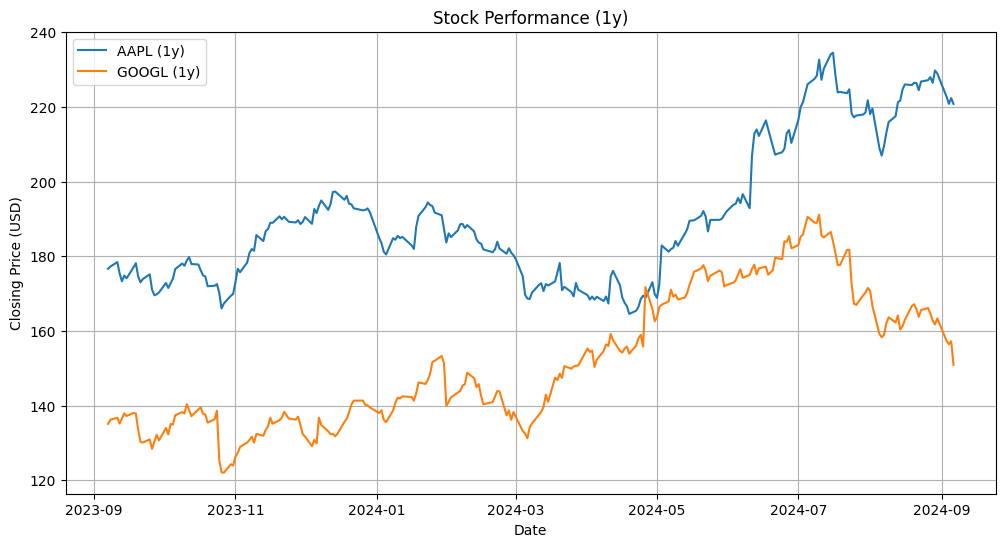

In [29]:
# Cell 3: Fetch and plot stock data for each period

# Loop through each period provided by the user
for period in periods:
    period = period.strip()   # Remove any leading/trailing spaces
    stock_data_period = {}  # Dictionary to hold stock data for the current period

    # Loop through each stock symbol to fetch historical data
    for symbol in user_symbols:
        ticker = yahoofin.Ticker(symbol)  # Fetch data for the current ticker symbol
         # Extract the 'Close' prices and store them in the dictionary
        stock_data_period[symbol] = ticker.history(period=period)['Close']

    # Convert the dictionary to a DataFrame for easier plotting
    df_period = pd.DataFrame(stock_data_period)

    # Plot the closing prices for the current period
    plt.figure(figsize=(12, 6))  # Set plot size
    for symbol in user_symbols:
        plt.plot(df_period.index, df_period[symbol], label=f"{symbol} ({period})")  # Plot each symbol

    # Add title, labels, legend, and grid to the plot
    plt.title(f"Stock Performance ({period})")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()  # Display the plot


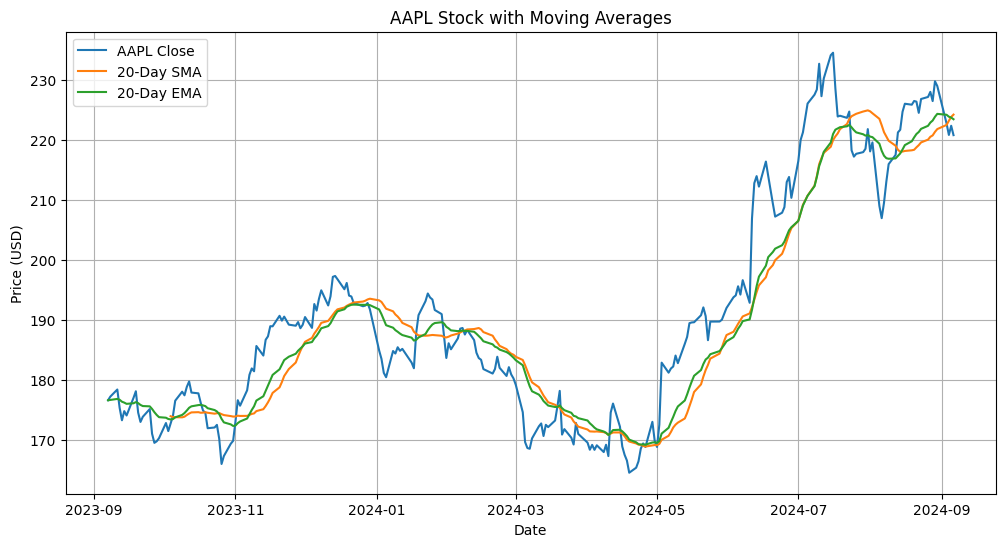

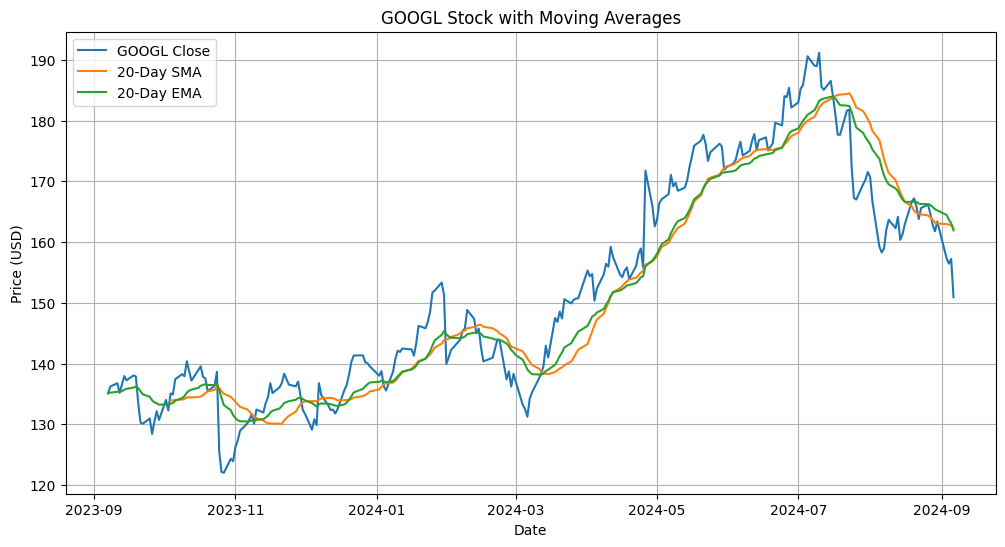

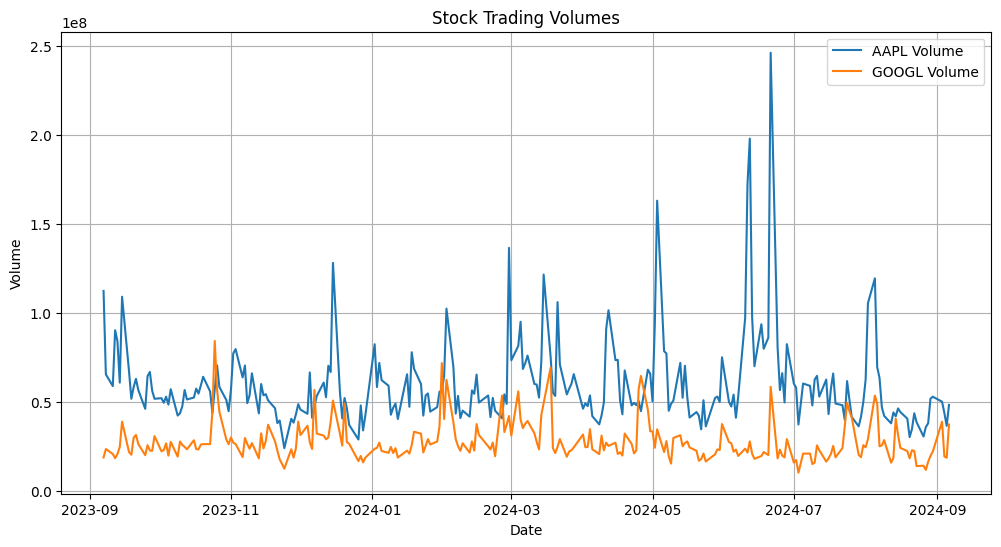

In [30]:
# Cell 4: Moving Averages and Volume Analysis

# Loop through each stock symbol to calculate and plot moving averages
for symbol in user_symbols:
    ticker = yahoofin.Ticker(symbol)  # Fetch data for the current ticker symbol
    df_ma = ticker.history(period=periods[0])  # Use the first period to get historical data

    # Calculate 20-day Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    df_ma['SMA_20'] = df_ma['Close'].rolling(window=20).mean()  # 20-day SMA
    df_ma['EMA_20'] = df_ma['Close'].ewm(span=20, adjust=False).mean()  # 20-day EMA

    # Plot the closing prices along with SMA and EMA
    plt.figure(figsize=(12, 6))  # Set plot size
    plt.plot(df_ma.index, df_ma['Close'], label=f"{symbol} Close")  # Plot closing prices
    plt.plot(df_ma.index, df_ma['SMA_20'], label="20-Day SMA")  # Plot 20-day SMA
    plt.plot(df_ma.index, df_ma['EMA_20'], label="20-Day EMA")  # Plot 20-day EMA

    # Add title, labels, legend, and grid to the plot
    plt.title(f"{symbol} Stock with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()  # Display the plot

# Volume Analysis
plt.figure(figsize=(12, 6))  # Set plot size
for symbol in user_symbols:
    ticker = yahoofin.Ticker(symbol)  # Fetch data for the current ticker symbol
    df_vol = ticker.history(period=periods[0])['Volume']  # Get trading volume data

    # Plot the trading volume
    plt.plot(df_vol.index, df_vol, label=f"{symbol} Volume")

# Add title, labels, legend, and grid to the plot
plt.title("Stock Trading Volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()  # Display the plot

In [31]:
# Cell 5: Interactive Plot with Plotly

# Create a subplot figure with one row per stock symbol
fig = make_subplots(rows=len(user_symbols), cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Loop through each stock symbol to add interactive plots
for i, symbol in enumerate(user_symbols, start=1):
    ticker = yahoofin.Ticker(symbol)  # Fetch data for the current ticker symbol
    df_plotly = ticker.history(period=periods[0])  # Use the first period to get historical data

    # Add a line plot for the closing prices to the subplot
    fig.add_trace(go.Scatter(x=df_plotly.index, y=df_plotly['Close'], mode='lines', name=symbol), row=i, col=1)

# Update layout and display the interactive plot
fig.update_layout(height=600, width=1000, title_text="Interactive Stock Performance")
fig.show()


In [33]:
# Cell 6: Stock Metrics Calculation and Display

# Loop through each stock symbol to calculate and display metrics
for symbol in user_symbols:
    ticker = yahoofin.Ticker(symbol)  # Fetch data for the current ticker symbol
    df_metrics = ticker.history(period=periods[0])  # Use the first period to get historical data

    # Calculate stock performance metrics
    high = df_metrics['Close'].max()  # Highest closing price
    low = df_metrics['Close'].min()  # Lowest closing price
    avg = df_metrics['Close'].mean()  # Average closing price

    # Calculate percentage change from the first to the last closing price
    pct_change = ((df_metrics['Close'].iloc[-1] - df_metrics['Close'].iloc[0]) / df_metrics['Close'].iloc[0]) * 100

    # Print the calculated metrics
    print(f"\n{symbol} Performance ({periods[0]}):")
    print(f"Highest Close: ${high:.2f}")
    print(f"Lowest Close: ${low:.2f}")
    print(f"Average Close: ${avg:.2f}")
    print(f"Percentage Change: {pct_change:.2f}%")



AAPL Performance (1y):
Highest Close: $234.55
Lowest Close: $164.59
Average Close: $190.58
Percentage Change: 25.00%

GOOGL Performance (1y):
Highest Close: $191.18
Lowest Close: $122.03
Average Close: $151.80
Percentage Change: 11.71%


In [34]:
# Cell 7: News Scraping and Display

# Define HTTP headers to mimic a real browser, which can improve success rates for requests
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
    # User-Agent string simulates a request from a specific browser and OS
}

def extract_article_data(article_card):
    """Extract and return headline, source, posted time, and link from an article card"""
    # Extract headline text from the 'h4' tag with class 's-title'
    headline = article_card.find('h4', 's-title').text.strip()

    # Extract source text from the 'span' tag with class 's-source'
    source = article_card.find('span', 's-source').text.strip()

    # Extract posted time, clean up the text by removing unnecessary characters
    posted_time = article_card.find('span', 's-time').text.replace('·', '').strip()

    # Extract raw link from the 'a' tag and create a full URL
    raw_url = article_card.find('a').get('href')
    full_url = requests.compat.urljoin('https://news.yahoo.com', raw_url)

    # Return a dictionary containing all extracted information
    return {
        'headline': headline,
        'source': source,
        'posted_time': posted_time,
        'url': full_url
    }

def fetch_news_articles(stock_symbol):
    """Fetch news articles from Yahoo News based on the stock symbol provided by the user"""

    search_url_template = 'https://news.search.yahoo.com/search?p={}'
    search_url = search_url_template.format(stock_symbol)

    articles = []
    unique_urls = set()

    while True:  # Loop to handle pagination
        # Send an HTTP GET request to the search URL
        response = requests.get(search_url, headers=headers)

        # Parse the response text using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all article cards on the page
        article_cards = soup.find_all('div', 'NewsArticle')

        # Extract data from each article card
        for card in article_cards:
            article_data = extract_article_data(card)
            url = article_data['url']
            if url not in unique_urls:  # Check for unique articles
                unique_urls.add(url)
                articles.append(article_data)

        # Attempt to find the link to the next page of results
        next_page_link = soup.find('a', class_='next')
        if next_page_link:
            # Update the search URL to the next page and proceed
            search_url = requests.compat.urljoin('https://news.search.yahoo.com', next_page_link.get('href'))
            sleep(0.5)  # Reduced delay to speed up execution
        else:
            break  # Exit loop if no next page is found

    # Return the list of articles
    return articles

# Fetch and display news for each stock symbol provided by the user
for symbol in user_symbols:
    symbol = symbol.strip()
    articles = fetch_news_articles(symbol)

    # Display the first 4 articles with clear formatting
    print(f"News for {symbol}:")
    for article in articles[:4]:
        print(f"Headline: {article['headline']}")
        print(f"Source: {article['source']}")
        print(f"Posted Time: {article['posted_time']}")
        print(f"URL: {article['url']}")
        print("\n")

News for AAPL:
Headline: Apple: Buy, Sell, or Hold?
Source: The Motley Fool via AOL
Posted Time: 46 minutes ago
URL: https://r.search.yahoo.com/_ylt=AwrhR0Uy2t1moEYej0DQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1725844146/RO=10/RU=https%3a%2f%2fwww.aol.com%2fapple-buy-sell-hold-162300139.html/RK=2/RS=qpvT1.4hUUEloYCvt2qZYZtmbws-


Headline: Apple Inc. (AAPL): Leading the Pack Among the Best ESG Stocks to Buy Now
Source: Insider Monkey via Yahoo Finance
Posted Time: 9 hours ago
URL: https://r.search.yahoo.com/_ylt=AwrhR0Uy2t1moEYekUDQtDMD;_ylu=Y29sbwNiZjEEcG9zAzIEdnRpZAMEc2VjA3Ny/RV=2/RE=1725844146/RO=10/RU=https%3a%2f%2ffinance.yahoo.com%2fnews%2fapple-inc-aapl-leading-pack-080628498.html%3ffr%3dsycsrp_catchall/RK=2/RS=3BgTNrNDAsGo2Ov3_FuV9T_Y9vc-


Headline: Jim Cramer on Apple Inc. (AAPL): ‘Hold On To Them’
Source: Insider Monkey via Yahoo Finance
Posted Time: 11 hours ago
URL: https://r.search.yahoo.com/_ylt=AwrhR0Uy2t1moEYek0DQtDMD;_ylu=Y29sbwNiZjEEcG9zAzMEdnRpZAMEc2Vj